In [10]:
from average_streamline_calculation.turbine import Turbine, TurbineType, StageGeomAndHeatDrop, TurbineGeomAndHeatDropDistribution 
from profiling.profiling import TurbineProfiling, StageProfiling, ProfilingType, BladeSection
import pickle as pk
import numpy as np
%matplotlib inline

In [11]:
def load(filename) -> Turbine:
    file = open(filename, 'rb')
    result = pk.load(file)
    file.close()
    return result

In [12]:
turbine = load(r'average_streamline_calculation\average_streamline_calculation_results')

In [13]:
turbine_profiling = TurbineProfiling(turbine, ProfilingType.ConstantAngle)

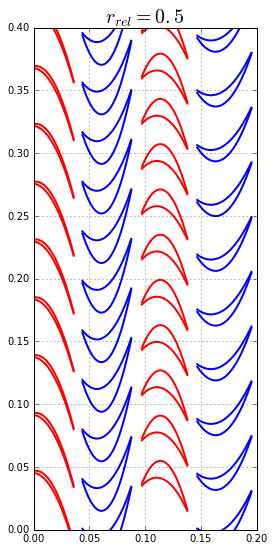

In [14]:
turbine_profiling[1].gamma1_k_sa_rel = 0.45
turbine_profiling[1].gamma1_k_rk_rel = 0.4
turbine_profiling.compute_profile()
turbine_profiling.plot2d(r_rel=0.5, figsize=(4, 9), ymax=0.4)

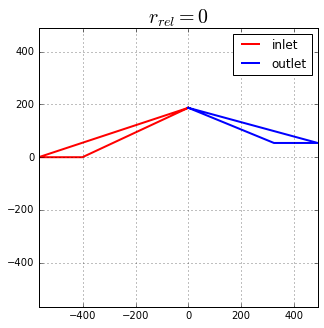

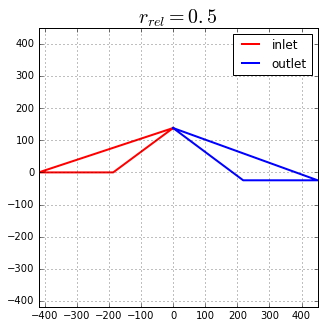

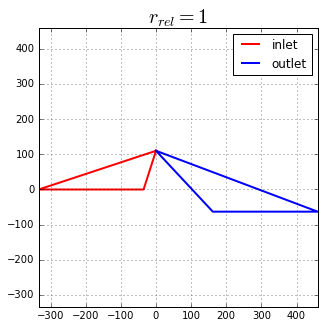

In [15]:
turbine_profiling[0].plot_velocity_triangles(figsize=(5, 5))

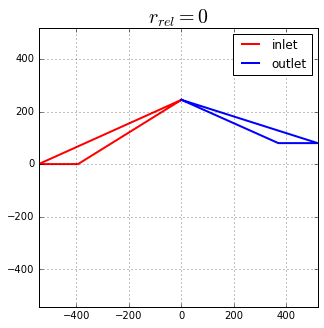

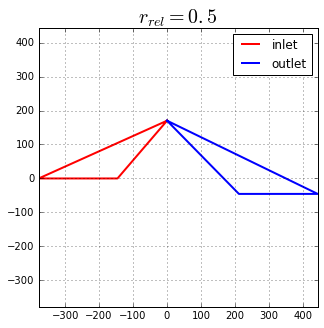

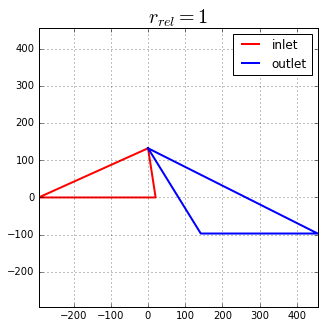

In [16]:
turbine_profiling[1].plot_velocity_triangles(figsize=(5, 5))